In [72]:
# import pandas for data analysis
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import datetime
from datetime import timedelta

%matplotlib inline

In [46]:
# import data from file, generated by novelty.js
df = pd.read_csv("./results/EuropeanComissionENG_tfidf.csv", sep=";", quotechar='~', quoting=1)

In [47]:
# convert unix timestamp to pandas datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
# cut learning phase out
ndf = df[201:]
# ndf = ndfa[ndfa['timestamp'] > '2016-12-01']

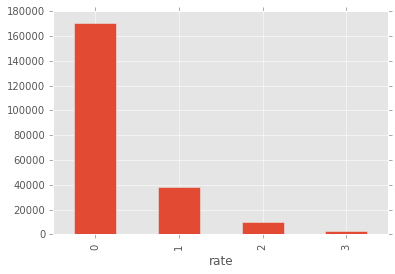

In [48]:
# plot histogram
ax = ndf[['title','rate']].groupby(['rate']).agg('count').plot(kind='bar', legend=False)

In [49]:
fig = ax.get_figure()
fig.savefig('figures/exENGhist_tfidf.pdf')

In [12]:
ndf[['title','rate']].groupby(['rate']).agg('count')

,title
rate,
0,370
1,142
2,44
3,26


In [302]:
# create time series from a dataset
df = pd.read_csv("./results/PeterPrevcSLV_tfidf.csv", sep=";", quotechar='~', quoting=1)
# convert unix timestamp to pandas datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
# cut learning phase out
ndfa = df[201:]

In [303]:
year = 2014; month = 1;
endYear = 2017; endMonth = 2;
intervalMonth = 2;

resultsdf = pd.DataFrame(columns=['Novelty Frequency', 'News'])
j = 0
cutoff = True

# iterate over all months
while ((year < endYear) or (month < endMonth)):
    startDate = datetime.date(year, month, 1);
    
    # increase month
    month = month + intervalMonth
    if (month > 12):
        year = year + 1
        month = month % 12
    
    endDate = datetime.date(year, month, 1);
    
    #print(startDate, endDate, len(ndf))
    
    ndf = ndfa[(ndfa['timestamp'] > startDate) & (ndfa['timestamp'] < endDate)]
    results = ndf[['title','rate']].groupby(['rate']).agg('count')
    
    # print(results)
    
    res = [0, 0, 0, 0]
    for i in range(4):
        if (i in results['title']):
            res[i] = results['title'][i]
        else:
            res[i] = 0

    allitems = res[0] + res[1] + res[2] + res[3]
    if (allitems == 0):
        allitems = 0.1
    novelty = res[2] + res[3]    

    # print(startDate, endDate, len(ndf), novelty/allitems)
    if (cutoff == False) or (allitems != 0.1):
        resultsdf.loc[endDate] = [novelty/allitems, allitems]
        j = j + 1
        cutoff = False
    
resultsdf

,Novelty Frequency,News
2015-03-01,0.000000,16.0
2015-05-01,0.158730,252.0
2015-07-01,0.242424,33.0
2015-09-01,0.056338,71.0
2015-11-01,0.086957,23.0
2016-01-01,0.047431,253.0
2016-03-01,0.076923,715.0
2016-05-01,0.092593,486.0
2016-07-01,0.080645,124.0
2016-09-01,0.000000,107.0


In [289]:
len(resultsdf)

37

In [292]:
# hack for MS data
resultsdf = resultsdf.drop(resultsdf.index[range(17,37)])

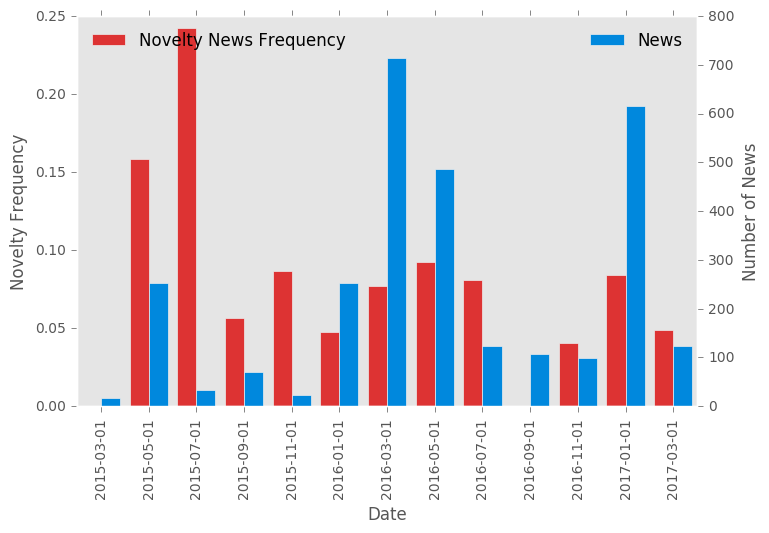

In [304]:
matplotlib.style.use('ggplot')
fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.set_ylabel('Novelty Frequency')
ax2.set_ylabel('Number of News')
ax.set_xlabel('Date')
width = 0.4

resultsdf['Novelty Frequency'].plot(kind='bar', color='#dd3333', ax=ax, position=1, width=0.4, label="Novelty News Frequency")
resultsdf['News'].plot(kind='bar', color='#0088dd',ax=ax2,position=0, width=0.4, label="News")

ax.legend(loc=2, frameon=False)
ax2.legend(loc=1, frameon=False)

ax.grid(False)
ax2.grid(False)

plt.gcf().subplots_adjust(bottom=0.25)

xticks, xticklabels = plt.xticks()
# shift half a step to the left
# x0 - (x1 - x0) / 2 = (3 * x0 - x1) / 2
xmin = (3*xticks[0] - xticks[1])/2.
# shaft half a step to the right
xmax = (3*xticks[-1] - xticks[-2])/2.
plt.xlim(xmin, xmax)
plt.xticks(xticks)

plt.show()

In [305]:
fig.savefig('figures/prevcSLV_rate.pdf')

In [306]:
# explore Microsoft dataset (what was the novelty in June 2014)
# create time series from a dataset
df = pd.read_csv("./results/MicrosoftENG_tfidf_4000.csv", sep=";", quotechar='~', quoting=1)
# convert unix timestamp to pandas datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
# cut learning phase out
ndfa = df[201:]

In [315]:
ndf = ndfa[(ndfa['timestamp'] > '2014-06-01') & (ndfa['timestamp'] < '2014-07-01') & (ndfa['rate'] > 2)]
pd.set_option('display.max_rows', 120)
ndf

,rate,title,timestamp
39299,3,Links 6/1/14,2014-06-01 22:21:00
39309,3,REA Group names Tracey Fellows as new chief,2014-06-01 23:14:00
39385,3,MatrikonOPC Server Now Supports Foxboro I/A Se...,2014-06-02 09:08:00
39465,3,U.S. Ambassador Is First to Take Oath on an E-...,2014-06-02 15:43:00
39466,3,Officials say missing Rainier climbers 'likely...,2014-06-02 15:45:00
39561,3,FiftyThree is out to turn the iPad into a digi...,2014-06-02 19:01:00
39611,3,Industry vets are helping NYU Game Center grad...,2014-06-02 20:50:00
39869,3,Cogswell College to Hold Open House for Prospe...,2014-06-03 15:15:00
39876,3,Slideshow: Lactation Rooms Around Seattle (And...,2014-06-03 15:58:00
39948,3,Six Clicks: Last year's most exciting crowdfun...,2014-06-03 20:05:00
